## README Chart Generator

This notebook generates the chart used in the main `README.md` file to visualize the number of unique symbols with price data available per year.


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Found 4 price data files to process...
Data processed. Yearly unique symbol counts:
    year  unique_symbol_count
36  2021                 8117
37  2022                 8564
38  2023                 7956
39  2024                 7269
40  2025                 6805

Chart saved successfully to 'symbols_per_year.png'


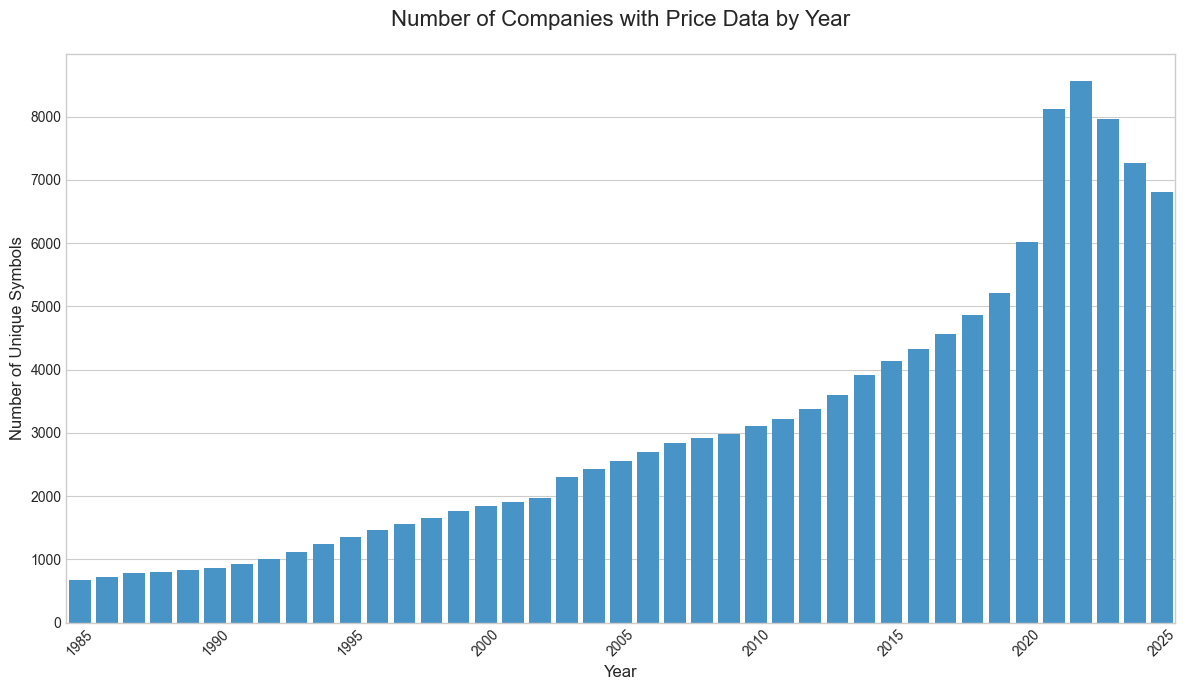

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# --- Configuration ---
price_data_dir = '../Prices/Price Data'
chart_output_path = 'symbols_per_year.png'

# --- Data Loading and Processing ---
price_files = glob.glob(os.path.join(price_data_dir, 'price_data_*.csv'))

if not price_files:
    print("Error: No price data files found. Please generate the price data first.")
else:
    print(f"Found {len(price_files)} price data files to process...")
    
    # Load and combine all price data chunks
    df_list = [pd.read_csv(f, usecols=['date', 'symbol']) for f in price_files]
    full_df = pd.concat(df_list, ignore_index=True)
    
    # Convert 'date' to datetime and extract the year
    full_df['date'] = pd.to_datetime(full_df['date'])
    full_df['year'] = full_df['date'].dt.year
    
    # Group by year and count distinct symbols
    yearly_symbol_counts = full_df.groupby('year')['symbol'].nunique().reset_index()
    yearly_symbol_counts.rename(columns={'symbol': 'unique_symbol_count'}, inplace=True)
    
    print("Data processed. Yearly unique symbol counts:")
    print(yearly_symbol_counts.tail()) # Display tail for recent years

    # --- Chart Generation ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))

    # Create the bar plot
    sns.barplot(
        data=yearly_symbol_counts, 
        x='year', 
        y='unique_symbol_count', 
        color='#3498db',
        ax=ax
    )

    # Formatting
    ax.set_title('Number of Companies with Price Data by Year', fontsize=16, pad=20)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Unique Symbols', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Set major ticks to appear every 5 years for clarity
    years = yearly_symbol_counts['year'].unique()
    ax.set_xticks(range(0, len(years), 5))
    ax.set_xticklabels(years[::5])

    plt.tight_layout()
    
    # Save the figure
    fig.savefig(chart_output_path, dpi=300)
    print(f"\nChart saved successfully to '{chart_output_path}'")
    plt.show()
